In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import StratifiedShuffleSplit as sss

In [2]:
housing = pd.read_csv('house.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.shape

(507, 14)

In [5]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
housing.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False
505,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
housing.fillna(housing.mean(),axis=0,inplace=True)

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     507 non-null    float64
 4   NOX      507 non-null    float64
 5   RM       507 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    float64
 9   TAX      507 non-null    float64
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(14)
memory usage: 55.6 KB


In [9]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.593041,23.299396,6.853571,0.253743,0.115763,0.701923,28.121033,2.103628,8.698651,168.370495,2.162805,91.204607,7.134002,9.188012
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082100,0.000000,5.190000,0.000000,0.449000,5.886000,45.050000,2.100350,4.000000,279.000000,17.400000,375.270000,6.970000,17.050000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.215700,5.000000,330.000000,19.000000,391.430000,11.380000,21.200000
75%,3.675945,12.500000,18.100000,0.000000,0.624000,6.622000,94.050000,5.164950,24.000000,666.000000,20.200000,396.220000,16.950000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


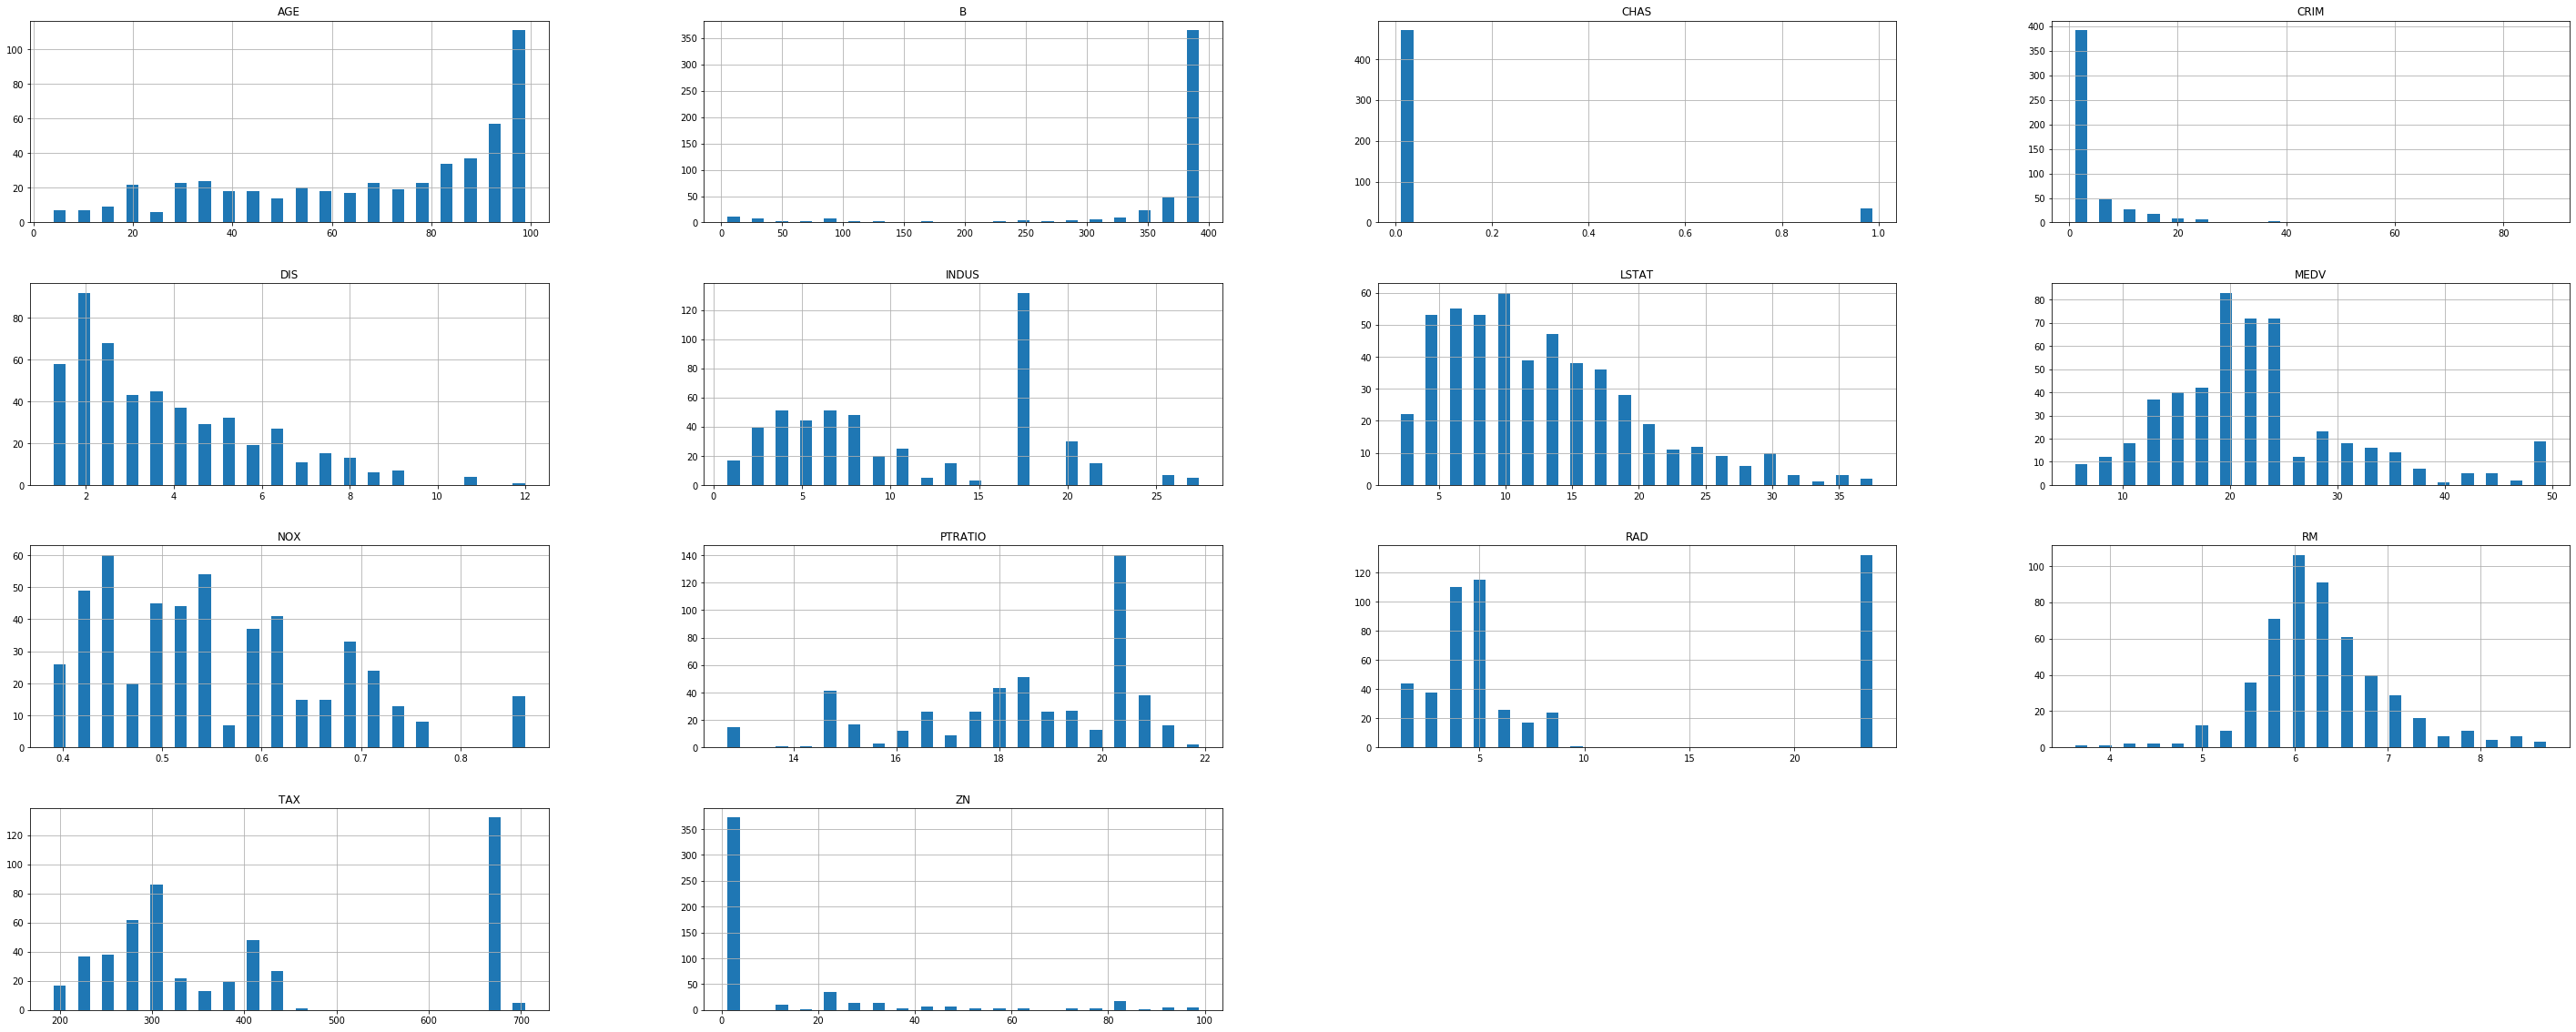

In [11]:
housing.hist(bins=20,rwidth=.5,figsize=(50,20));

In [12]:
train_set, test_set = tts(housing,test_size = 0.2,random_state=42)

In [13]:
train_set.shape

(405, 14)

In [14]:
test_set.shape

(102, 14)

In [15]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
housing['CHAS'].value_counts()

0.00000    471
1.00000     35
0.06917      1
Name: CHAS, dtype: int64

In [17]:
housing['CHAS'][506]=0

In [18]:
split = sss(n_splits=1,test_size=0.2,random_state=42)

In [19]:
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
housing = strat_train_set.copy()

In [21]:
# sb.pairplot(housing)

In [22]:
housing.corr()['MEDV'].sort_values(ascending =  False)

MEDV       1.000000
RM         0.677192
B          0.360640
ZN         0.339719
DIS        0.240342
CHAS       0.205075
AGE       -0.362920
RAD       -0.372190
CRIM      -0.393266
NOX       -0.422248
TAX       -0.451675
INDUS     -0.473368
PTRATIO   -0.495166
LSTAT     -0.736915
Name: MEDV, dtype: float64

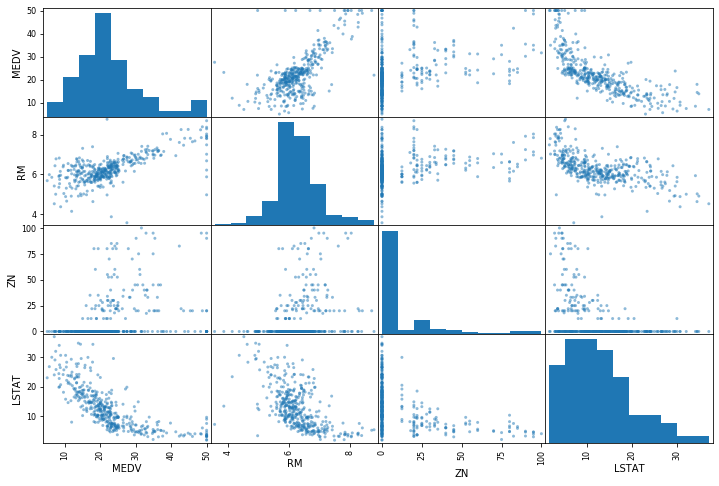

In [23]:
attributes = ['MEDV','RM','ZN','LSTAT']
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,8));

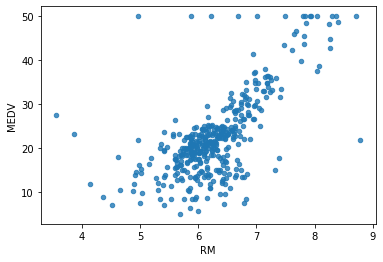

In [24]:
housing.plot(kind='scatter',x='RM', y='MEDV', alpha=0.8)

In [25]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [26]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
104,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,62.266904
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,43.497173
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64,50.520567
146,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,71.606254
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00,61.985472


In [28]:
# housing.corr()['MEDV'].sort_values(ascending =  False)

In [29]:
# housing.plot(kind='scatter',x='TAXRM', y='MEDV', alpha=0.8)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [31]:
imputer.statistics_.shape

(14,)

In [32]:
 X = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [34]:
housing_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
0,0.13960,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33,62.266904
1,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,43.497173
2,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64,50.520567
3,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,71.606254
4,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00,61.985472


In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,3.603428,10.809877,11.322593,0.069136,0.558212,6.279914,68.683951,3.748081,9.762963,411.886420,18.479753,353.483975,12.734222,67.371276
std,8.089971,22.129757,6.828999,0.253999,0.116804,0.708024,28.270280,2.094706,8.755372,168.423167,2.130503,95.940129,7.168212,31.330026
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086640,0.000000,5.190000,0.000000,0.453000,5.880000,44.400000,2.045900,4.000000,284.000000,17.400000,374.430000,6.900000,44.807506
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.209000,77.700000,3.132300,5.000000,337.000000,19.000000,390.950000,11.480000,53.867403
75%,3.696950,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,16.960000,98.201121
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


## Scikit-learn Design

primarily three type of object
1. Estimator :- It estimate parameter based on a dataset. eg imputer
                It has a fit method and transform method.
                Fit method - fit the dataset and calculate internal parameter 
                
2. Transformers :- transform method takes input and returns output based on the learning from fit .
                  It also hase a convenience function called fit_transform() which fits and then transforms.

3. Predictors :-nearRegression model is an example of predictor.
                fit() and predict() are two common functions.
                It also gives score funstion which will evaluate the prediction

two type of feature scaling methods:
1: Min-Max scalling (normalizattion)
        (value-min)/(max-min)
2: standization 
        (value-mean)/std

## Pipeine

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
#     ......as many as possibale
    ('std_scaler', StandardScaler()),
])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [38]:
housing_num_tr.shape

(405, 14)

## Model

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [77]:
some_data = housing.iloc[:5]

In [78]:
some_labels = housing_labels.iloc[:5]

In [79]:
prepared_data = my_pipeline.transform(some_data)

In [80]:
model.predict(prepared_data)

array([20.039, 24.107, 21.777, 15.627, 21.591])

In [81]:
list(some_labels)

[20.1, 22.0, 22.6, 15.6, 21.7]

In [82]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)

In [83]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [84]:
lin_mse

1.584812320987653

In [85]:
lin_rmse = np.sqrt(lin_mse)

In [86]:
np.round(lin_rmse,2)

1.26

## cross validation 

In [87]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv = 405)
rmse_scores = np.sqrt(-score)

In [88]:
def print_scores(score):
#     print('Score : ',score)
    print("Mean : ", np.round(score.mean(),2))
    print("Standard deviation : ", np.round(score.std(),2))

In [89]:
print_scores(rmse_scores)

Mean :  2.19
Standard deviation :  2.45
